# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes

# Cas de tests, Modele linéaire

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

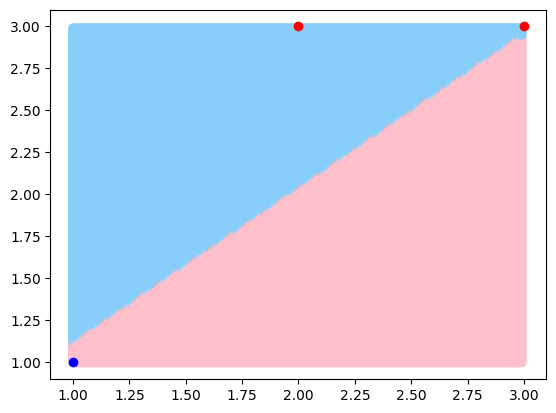

<Figure size 640x480 with 0 Axes>

In [4]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
my_lib.delete_float_array.restype = None
my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)



dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)

Y = np.array([
      1,
      0,
      0
], dtype=ctypes.c_float)

X_plot = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])

Y_plot = np.array([
      1,
      -1,
      -1
])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 10000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)

predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100* min(X_plot[:, 0]),100* max(X_plot[:, 0])) :
  for x2 in range(100*min(X_plot[:, 1]), 100*max(X_plot[:, 1])) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [5]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

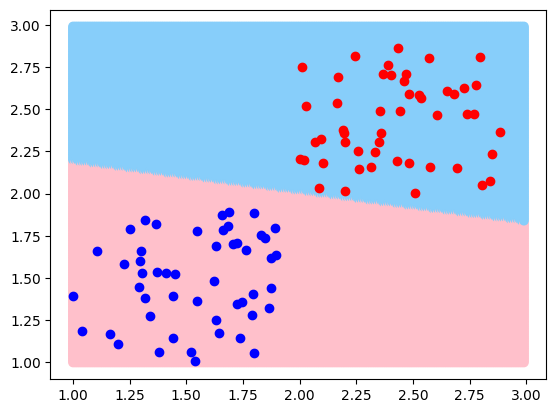

<Figure size 640x480 with 0 Axes>

In [6]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * 0.0], dtype=ctypes.c_float)

X_plot = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y_plot = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * 0.0])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 100000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)

predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(100 , 300) :
  for x2 in range(100 , 300) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

In [7]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

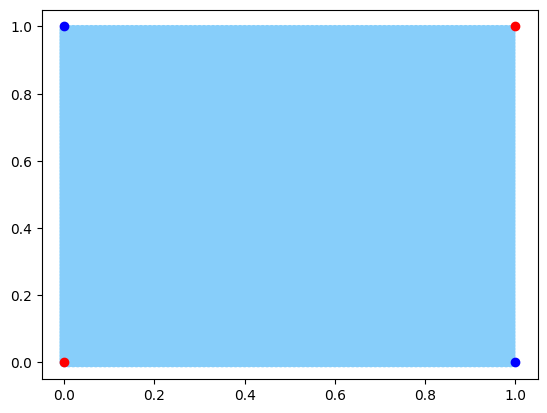

<Figure size 640x480 with 0 Axes>

In [8]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype= ctypes.c_float)
Y = np.array([1, 1, -1, -1], dtype= ctypes.c_float)

X_plot = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y_plot = np.array([1, 1, -1, -1])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 10000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)

predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(0 , 100) :
  for x2 in range(0 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')

plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [9]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

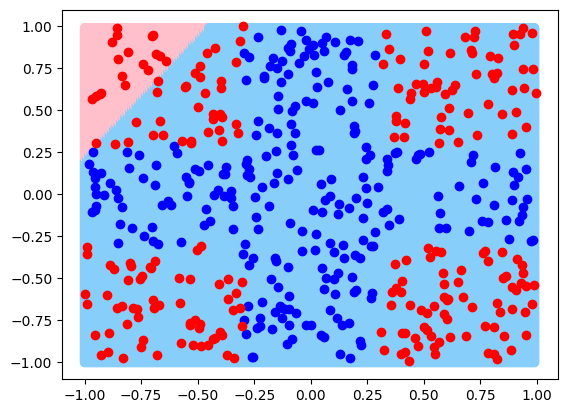

<Figure size 640x480 with 0 Axes>

In [10]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.random.random((500, 2)) * 2.0 - 1.0
X = np.array(X, dtype= ctypes.c_float)
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
Y = np.array(Y, dtype= ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 100000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

linear_model_training_ptr = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    linear_model_training_ptr, ((dimension + 1),)
)

predicted_labels = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    predicted_labels.append('pink' if x1/100 * trained_linear_model[1] + x2/100 * trained_linear_model[2] + trained_linear_model[0] >= 0 else 'lightskyblue')


plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

In [11]:
my_lib.delete_float_array(linear_model_training_ptr, (dimension + 1))
del linear_model_training_ptr

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

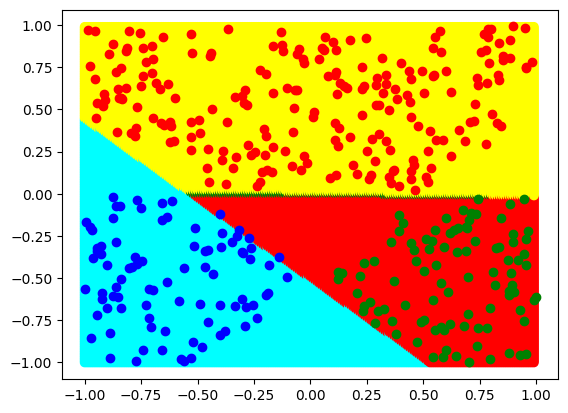

<Figure size 640x480 with 0 Axes>

In [14]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

Y_1 = [x[0] for x in Y]
Y_2 = [x[1] for x in Y]
Y_3 = [x[2] for x in Y]


X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)
Y_1 = np.array(Y_1, dtype=ctypes.c_float)
Y_2 = np.array(Y_2, dtype=ctypes.c_float)
Y_3 = np.array(Y_3, dtype=ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X_plot])

X_plot = X_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]
Y_plot = Y_plot[[not np.all(arr == [0, 0, 0]) for arr in Y_plot]]

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.01)
epoch = 1000000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_1_to_predict = (ctypes.c_float * len(Y_1))(*Y_1)
y_1_to_predict_ptr = ctypes.cast(y_1_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_2_to_predict = (ctypes.c_float * len(Y_2))(*Y_2)
y_2_to_predict_ptr = ctypes.cast(y_2_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_3_to_predict = (ctypes.c_float * len(Y_3))(*Y_3)
y_3_to_predict_ptr = ctypes.cast(y_3_to_predict, LP_c_float)

my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]

my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

linear_model_training_ptr_1 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_1_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_1 = np.ctypeslib.as_array(
    linear_model_training_ptr_1, ((dimension + 1),)
)

w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_2 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_2 = np.ctypeslib.as_array(
    linear_model_training_ptr_2, ((dimension + 1),)
)

w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_3 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_3 = np.ctypeslib.as_array(
    linear_model_training_ptr_3, ((dimension + 1),)
)

predicted_labs = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    if (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] >= 0) :
        predicted_labs.append('aqua')
    elif (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] >= 0) :
        predicted_labs.append('yellow')
    elif (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] <= 0) :
        predicted_labs.append('red')
    else :
        predicted_labs.append('green')

plt.scatter(predicted_x1, predicted_x2, c=predicted_labs)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [15]:
my_lib.delete_float_array(linear_model_training_ptr_1, (dimension + 1))
my_lib.delete_float_array(linear_model_training_ptr_2, (dimension + 1))
my_lib.delete_float_array(linear_model_training_ptr_3, (dimension + 1))
del linear_model_training_ptr_1
del linear_model_training_ptr_2
del linear_model_training_ptr_3

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

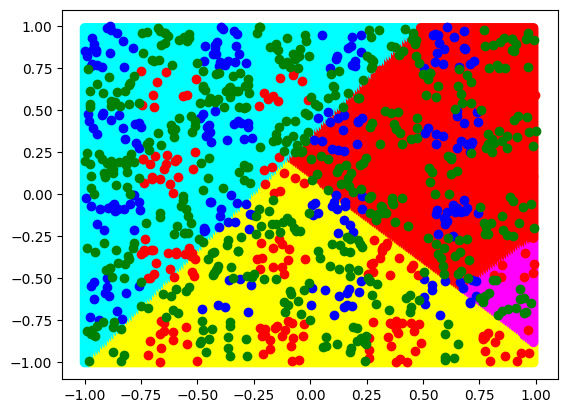

<Figure size 640x480 with 0 Axes>

In [16]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_w.argtypes = [ctypes.c_int32]
my_lib.generate_random_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_random_w(dimension)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

Y_1 = [x[0] for x in Y]
Y_2 = [x[1] for x in Y]
Y_3 = [x[2] for x in Y]

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)
Y_1 = np.array(Y_1, dtype=ctypes.c_float)
Y_2 = np.array(Y_2, dtype=ctypes.c_float)
Y_3 = np.array(Y_3, dtype=ctypes.c_float)

X_plot = np.random.random((1000, 2)) * 2.0 - 1.0
Y_plot = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.01)
epoch = 100000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_1_to_predict = (ctypes.c_float * len(Y_1))(*Y_1)
y_1_to_predict_ptr = ctypes.cast(y_1_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_2_to_predict = (ctypes.c_float * len(Y_2))(*Y_2)
y_2_to_predict_ptr = ctypes.cast(y_2_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_3_to_predict = (ctypes.c_float * len(Y_3))(*Y_3)
y_3_to_predict_ptr = ctypes.cast(y_3_to_predict, LP_c_float)

my_lib.linear_model_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]

my_lib.linear_model_training.restype = ctypes.POINTER(ctypes.c_float)

linear_model_training_ptr_1 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_1_to_predict_ptr,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_1 = np.ctypeslib.as_array(
    linear_model_training_ptr_1, ((dimension + 1),)
)

w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_2 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_2 = np.ctypeslib.as_array(
    linear_model_training_ptr_2, ((dimension + 1),)
)

w_array_ptr = my_lib.generate_random_w(dimension)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))
linear_model_training_ptr_3 = my_lib.linear_model_training(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    y_2_to_predict,  # pointeur vers les résultats labellisés pour entrainer le modele
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # array size
    dimension,  # dimension de chaque vecteur
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model_3 = np.ctypeslib.as_array(
    linear_model_training_ptr_3, ((dimension + 1),)
)

predicted_labs = []
predicted_x1 = []
predicted_x2 = []
for x1 in range(-100 , 100) :
  for x2 in range(-100 , 100) :
    predicted_x1.append(x1/100)
    predicted_x2.append(x2/100)
    if (x1/100 * trained_linear_model_1[1] + x2/100 * trained_linear_model_1[2] + trained_linear_model_1[0] >= 0) :
        predicted_labs.append('aqua')
    elif (x1/100 * trained_linear_model_2[1] + x2/100 * trained_linear_model_2[2] + trained_linear_model_2[0] >= 0) :
        predicted_labs.append('yellow')
    elif (x1/100 * trained_linear_model_3[1] + x2/100 * trained_linear_model_3[2] + trained_linear_model_3[0] <= 0) :
        predicted_labs.append('red')
    else :
        predicted_labs.append('magenta')


plt.scatter(predicted_x1, predicted_x2, c=predicted_labs)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [17]:
my_lib.delete_float_array(linear_model_training_ptr_1, (dimension + 1))
my_lib.delete_float_array(linear_model_training_ptr_2, (dimension + 1))
my_lib.delete_float_array(linear_model_training_ptr_3, (dimension + 1))
del linear_model_training_ptr_1
del linear_model_training_ptr_2
del linear_model_training_ptr_3